In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pathlib
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from keras.regularizers import l2
import keras
from keras import layers
import keras
from keras.models import Sequential

In [2]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [ ]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'human spoof'.split()
for g in genres:
    for filename in sort(os.listdir(f'./Training_Data/{g}'):
        songname = f'./Training_Data/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        rmse = librosa.feature.rms(y=y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [379]:
data = pd.read_csv('dataset.csv')
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,human_08013.wav,0.444933,0.007800,1489.463689,1826.151917,3494.838867,0.054733,-498.247986,100.769714,6.021977,...,-2.499109,0.566711,-7.347786,5.846417,-5.423368,-0.218140,-2.293036,-0.122655,-2.963716,human
1,spoof_02901.wav,0.303776,0.182356,1523.872844,1458.566087,2803.997537,0.079584,-259.724731,97.618546,-8.221870,...,-4.336678,-7.536131,-8.575299,6.384124,-13.293413,1.263964,-7.960830,-3.540164,-5.284973,spoof
2,spoof_22757.wav,0.405250,0.107951,944.567105,897.169235,1706.781407,0.065758,-333.564026,175.135117,15.073410,...,-12.434177,-7.559663,-1.533542,1.965597,2.920362,-5.923123,-8.063422,-5.007302,-10.426505,spoof
3,spoof_08633.wav,0.342526,0.085134,1025.078922,1047.732539,1791.067046,0.059838,-302.697601,151.467484,-25.123474,...,-16.138575,-0.188873,-9.700819,-8.371861,5.581297,-2.493996,-13.833961,-3.399824,0.289134,spoof
4,human_03625.wav,0.286500,0.148399,1414.955533,1239.749255,2431.208124,0.094204,-257.747925,112.319237,-5.020204,...,-11.577963,-2.596365,-10.679747,-3.525143,-11.333459,-10.397132,0.699014,-11.565571,-2.250370,human


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf9d3d3820>]],
      dtype=object)

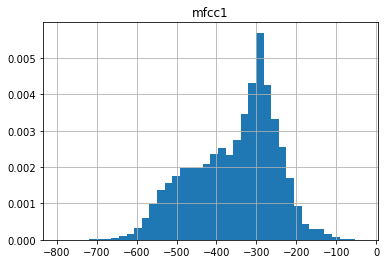

In [380]:
# Удаление ненужных столбцов
data = data.drop(['filename', 'spectral_centroid', 'rolloff', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc13', 'mfcc15', 'mfcc17', 'mfcc18', 'mfcc20', 'mfcc5', 'mfcc7', 'mfcc8', 'mfcc11'],axis=1)
# Создание меток
d = {'human': 1, 'spoof': 0}
data = data.replace(d)
# Нормализация столбцов признаков
scaler = StandardScaler()

y = data.iloc[:, -1]
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

data.mean()
data.hist(column='mfcc1', bins=40, density=True)

In [370]:
y = data.iloc[:, -1]
X = np.array(data.iloc[:, :-1])
# Разделение данных на обучающий и тестовый набор
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler_for_train = StandardScaler()
scaler_for_test = StandardScaler()

#X = np.array(data.iloc[:, :-1], dtype = float)
X_train = scaler_for_train.fit_transform(X_train)
X_test = scaler_for_test.fit_transform(X_test)
data.head()

,chroma_stft,rmse,spectral_bandwidth,zero_crossing_rate,mfcc1,mfcc6,mfcc9,mfcc10,mfcc12,mfcc14,mfcc16,mfcc19,label
0,0.351205,0.032108,1388.023782,0.133139,-411.461670,-23.505165,-25.563301,-12.515096,-8.358331,2.843531,-4.369453,-4.550228,0
1,0.414234,0.051686,1606.598254,0.044834,-333.718567,11.989635,1.406395,1.404653,8.188867,-6.112035,-4.872885,1.133418,0
2,0.351523,0.102221,1554.526333,0.134690,-165.908615,13.945991,-1.304652,-3.183449,2.827756,-6.247966,-5.610843,9.853608,0
3,0.460682,0.088982,1640.988089,0.199219,-312.987152,-7.587264,-34.103218,3.880684,-7.280396,-18.079199,-9.637965,7.530109,0
4,0.360792,0.137690,1393.904677,0.084532,-245.206512,14.901815,-15.538700,2.894233,-10.270273,-15.074326,-2.150130,0.523444,0


In [371]:
from keras import backend as K

def eer(y_true, y_pred):
    return (y_true - y_pred)

In [383]:
model = Sequential()
regularisation_coef=1e-4
model.add(layers.Dense(128, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model.add(layers.Dense(64, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model.add(layers.Dense(32, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
# model.add(layers.Dense(16, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['mse', 'accuracy']) # sparse_categorical_crossentropy
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [384]:
classifier = model.fit(X, y, epochs=150, batch_size=128) #batch_size=128)# batch_size=128, validation_split=0.2)#callbacks=[callback], validation_split=0.2)

Epoch 1/150
391/391 [==============================] - 0s 831us/step - loss: 0.3243 - mse: 0.3987 - accuracy: 0.8773
Epoch 2/150
391/391 [==============================] - 0s 824us/step - loss: 0.2292 - mse: 0.4345 - accuracy: 0.9198
Epoch 3/150
391/391 [==============================] - 0s 811us/step - loss: 0.2002 - mse: 0.4443 - accuracy: 0.9308
Epoch 4/150
391/391 [==============================] - 0s 812us/step - loss: 0.1842 - mse: 0.4502 - accuracy: 0.9374
Epoch 5/150
391/391 [==============================] - 0s 826us/step - loss: 0.1727 - mse: 0.4538 - accuracy: 0.9409
Epoch 6/150
391/391 [==============================] - 0s 853us/step - loss: 0.1649 - mse: 0.4566 - accuracy: 0.9440
Epoch 7/150
391/391 [==============================] - 0s 863us/step - loss: 0.1566 - mse: 0.4591 - accuracy: 0.9468
Epoch 8/150
391/391 [==============================] - 0s 833us/step - loss: 0.1494 - mse: 0.4611 - accuracy: 0.9505
Epoch 9/150
391/391 [==============================] - 0s 801us/

391/391 [==============================] - 0s 883us/step - loss: 0.0568 - mse: 0.4921 - accuracy: 0.9903
Epoch 140/150
391/391 [==============================] - 0s 877us/step - loss: 0.0601 - mse: 0.4914 - accuracy: 0.9887
Epoch 141/150
391/391 [==============================] - 0s 876us/step - loss: 0.0593 - mse: 0.4916 - accuracy: 0.9890
Epoch 142/150
391/391 [==============================] - 0s 904us/step - loss: 0.0540 - mse: 0.4921 - accuracy: 0.9917
Epoch 143/150
391/391 [==============================] - 0s 872us/step - loss: 0.0564 - mse: 0.4925 - accuracy: 0.9904
Epoch 144/150
391/391 [==============================] - 0s 897us/step - loss: 0.0597 - mse: 0.4916 - accuracy: 0.9892
Epoch 145/150
391/391 [==============================] - 0s 898us/step - loss: 0.0559 - mse: 0.4919 - accuracy: 0.9902
Epoch 146/150
391/391 [==============================] - 0s 914us/step - loss: 0.0605 - mse: 0.4917 - accuracy: 0.9897
Epoch 147/150
391/391 [==============================] - 0s 92

In [374]:
print(model.evaluate(X_test, y_test, batch_size=128))

79/79 [==============================] - 0s 631us/step - loss: 0.2406 - mse: 0.4868 - accuracy: 0.9471
[0.2406214326620102, 0.4867926239967346, 0.9470999836921692]


0.49999997

In [274]:
print(y_test)

17118    0
19366    0
13837    0
10989    1
43403    0
        ..
36531    0
4360     0
47256    1
40789    0
43530    0
Name: label, Length: 10000, dtype: int64


In [325]:
ans = []
pred = model.predict(X_test)
for i in pred:
    if (i[0] >= i[1]):
        ans.append(0)
    if (i[0] < i[1]):
        ans.append(1)
g = 0
for i in y_test:
    #print(g, y_test[g])
    if (i != ans[g]):
        print(i, pred[g], g)
    g += 1

0 [0.42167652 0.5783234 ] 2
0 [0.41648263 0.5835174 ] 6
1 [0.6550627  0.34493738] 19
0 [0.04805067 0.95194936] 45
1 [0.9308618  0.06913827] 65
0 [0.04254961 0.9574504 ] 66
0 [0.3166042 0.6833958] 70
0 [0.21151887 0.7884811 ] 85
1 [0.85498166 0.14501837] 90
0 [0.03797901 0.96202093] 103
0 [0.18269461 0.81730545] 155
1 [0.8857427  0.11425729] 171
0 [0.1621295 0.8378704] 182
0 [0.27439708 0.725603  ] 188
0 [0.31332877 0.68667126] 190
0 [0.20720537 0.79279464] 203
0 [0.49331844 0.50668156] 219
1 [0.7819386  0.21806136] 227
0 [0.02654905 0.9734509 ] 330
0 [0.29551166 0.7044884 ] 341
1 [0.6779022 0.3220978] 372
1 [0.55957955 0.44042042] 387
0 [0.39387733 0.6061227 ] 419
0 [0.4667233 0.5332766] 463
1 [0.6673031  0.33269694] 470
1 [0.9761326  0.02386741] 491
1 [0.7032669  0.29673305] 515
1 [0.9691822  0.03081783] 530
1 [0.9785589  0.02144117] 539
1 [0.9889613  0.01103873] 541
1 [0.521191   0.47880897] 586
0 [0.37507942 0.62492055] 590
0 [0.00586219 0.99413776] 614
1 [0.7814682  0.21853182] 643

0 [0.31964782 0.68035215] 9572
1 [0.9671019  0.03289808] 9575
0 [0.3195813 0.6804188] 9584
0 [0.00511664 0.99488336] 9591
0 [0.38619125 0.61380875] 9617
0 [0.00345682 0.9965431 ] 9638
1 [0.55142766 0.44857237] 9649
1 [0.8767683  0.12323166] 9693
1 [0.66669285 0.33330718] 9706
1 [0.6141873 0.3858127] 9722
0 [0.01770075 0.98229927] 9731
1 [0.98744196 0.01255806] 9746
0 [0.38993767 0.61006236] 9791
1 [0.5235265  0.47647348] 9792
0 [0.34817234 0.6518277 ] 9798
1 [0.79308385 0.20691611] 9802
0 [0.00583883 0.9941612 ] 9809
0 [0.05299708 0.94700295] 9845
1 [0.99411005 0.00588993] 9859
0 [0.09502322 0.9049768 ] 9884
0 [0.49711823 0.50288177] 9890
1 [0.5807643  0.41923568] 9941
0 [0.14426443 0.85573554] 9963
1 [0.51392716 0.48607284] 9964
1 [0.97888607 0.02111392] 9971
0 [0.43586347 0.56413656] 9973
0 [0.3667327 0.6332673] 9980


In [309]:
a = []
b = []
g = 0
for i in model.predict(X_test):
    if (i[0] < 0.7) and (i[0] > 0.3):
        a.append(X_test[g])
        b.append(y[g])
    g += 1
print(a)

[array([ 0.44228189, -0.14327825,  0.73081094,  0.60640906,  0.56750772,
        1.52139764,  0.58538449, -0.02523024,  0.13204129, -0.79536931,
       -0.12261958, -0.52765507]), array([-0.52936696, -0.07927874,  1.21316205,  0.10648845,  0.39063194,
        0.96576246,  0.83477445, -0.40250107, -0.8094209 ,  0.06028552,
       -1.2294108 , -2.25946511]), array([ 0.99381777, -0.96397797,  0.3440588 ,  0.63072851, -0.84213491,
        0.97688603, -0.16610557, -0.98168053, -0.79989623, -0.59589952,
       -1.32451195,  0.30714152]), array([-0.67355532,  1.8521259 , -0.48905132, -0.56824678,  1.20720437,
        0.64972642,  0.81795665, -0.08876612,  0.05474471,  0.58385223,
        0.49520166,  1.05974607]), array([ 0.41884117, -0.72827167, -0.28597053,  0.7701631 , -0.34358515,
       -1.72374025, -0.80484411,  0.5054181 , -0.77145314, -0.19024436,
       -0.47982972,  0.24449938]), array([ 1.41682749, -1.00403878, -0.04478552, -0.30137448, -1.99850825,
        0.03999793,  0.75526055,

In [310]:
model2 = Sequential()
regularisation_coef=1e-3
model2.add(layers.Dense(128, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model2.add(layers.Dense(64, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model2.add(layers.Dense(32, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model2.add(layers.Dense(16, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model2.add(layers.Dense(8, activation='relu', bias_regularizer=l2(regularisation_coef), kernel_regularizer=l2(regularisation_coef), activity_regularizer=l2(regularisation_coef)))
model2.add(layers.Dense(2, activation='softmax'))
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['mse', 'accuracy']) # sparse_categorical_crossentropy
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [311]:
classifier2 = model2.fit(np.array(a), pd.Series(b), epochs=100, batch_size=128) #batch_size=128)# batch_size=128, validation_split=0.2)#callbacks=[callback], validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8334 - mse: 0.2534 - accuracy: 0.7975
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7589 - mse: 0.2682 - accuracy: 0.8123
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7124 - mse: 0.2951 - accuracy: 0.8123
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6910 - mse: 0.3301 - accuracy: 0.8123
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6894 - mse: 0.3578 - accuracy: 0.8123
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6863 - mse: 0.3668 - accuracy: 0.8123
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6750 - mse: 0.3595 - accuracy: 0.8123
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6629 - mse: 0.3452 - accuracy: 0.8123
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6568 - mse: 0.3342 - accuracy: 0.8123
E

In [312]:
print()

4/4 [==============================] - 0s 814us/step - loss: 0.1446 - mse: 0.4833 - accuracy: 0.9975
[0.14455464482307434, 0.4833444356918335, 0.9975308775901794]


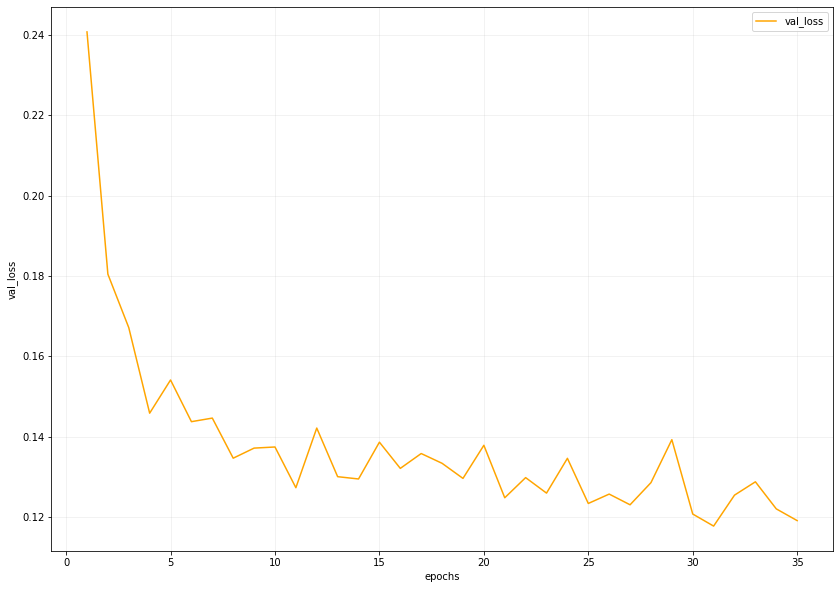

In [175]:
val_loss = classifier.history['val_loss']
xc = range(1, len(classifier.history['val_loss'])+1)

plt.figure(figsize=(14,10))
plt.plot(xc, val_loss, label='val_loss', c='orange')
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

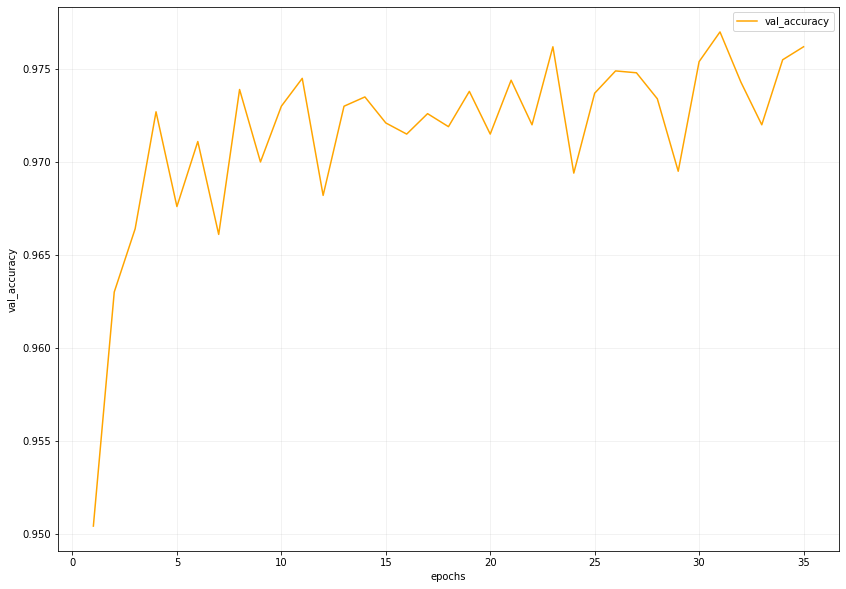

In [176]:
val_loss = classifier.history['val_accuracy']
xc = range(1, len(classifier.history['val_accuracy'])+1)

plt.figure(figsize=(14,10))
plt.plot(xc, val_loss, label='val_accuracy', c='orange')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [15]:
model.save_weights('./weights/my_model')
#model.load_weights('./weights/my_model')

In [234]:
data.corr()


,chroma_stft,rmse,spectral_bandwidth,zero_crossing_rate,mfcc1,mfcc6,mfcc9,mfcc10,mfcc12,mfcc14,mfcc16,mfcc19,label
chroma_stft,1.000000,-0.453419,0.344097,0.103318,-0.347353,0.238350,0.057467,0.330062,0.245175,-0.039716,0.231724,0.383510,0.148496
rmse,-0.453419,1.000000,-0.359771,-0.108575,0.773980,-0.095643,-0.035000,-0.174258,-0.188784,-0.083711,-0.114828,-0.276002,-0.246024
spectral_bandwidth,0.344097,-0.359771,1.000000,0.376541,-0.144501,0.434941,-0.044797,0.184097,0.055438,-0.223381,-0.274252,0.171892,0.118535
zero_crossing_rate,0.103318,-0.108575,0.376541,1.000000,0.126962,-0.079698,-0.222985,0.016688,-0.024271,-0.219945,-0.213481,0.163705,-0.230420
mfcc1,-0.347353,0.773980,-0.144501,0.126962,1.000000,-0.097764,-0.000142,-0.094003,-0.106600,-0.127234,-0.143254,-0.128397,-0.323446
mfcc6,0.238350,-0.095643,0.434941,-0.079698,-0.097764,1.000000,0.353901,0.295306,0.190996,-0.096157,0.004855,0.134022,0.120056
mfcc9,0.057467,-0.035000,-0.044797,-0.222985,-0.000142,0.353901,1.000000,0.179969,0.488499,0.422561,0.188932,0.018495,0.194543
mfcc10,0.330062,-0.174258,0.184097,0.016688,-0.094003,0.295306,0.179969,1.000000,0.452661,0.049597,0.140642,0.395133,0.111533
mfcc12,0.245175,-0.188784,0.055438,-0.024271,-0.106600,0.190996,0.488499,0.452661,1.000000,0.315486,0.207025,0.382356,0.139123
mfcc14,-0.039716,-0.083711,-0.223381,-0.219945,-0.127234,-0.096157,0.422561,0.049597,0.315486,1.000000,0.221769,0.072724,0.181525


In [116]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [122]:
file = open('test-dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for filename in sorted(os.listdir(f'./Testing_Data/')):
    songname = f'./Testing_Data/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)
    rmse = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    file = open('test-dataset.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [388]:
data = pd.read_csv('test-dataset.csv')
data = data.drop(['spectral_centroid', 'rolloff', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc13', 'mfcc15', 'mfcc17', 'mfcc18', 'mfcc20', 'mfcc5', 'mfcc7', 'mfcc8', 'mfcc11'],axis=1)
data.head()

,filename,chroma_stft,rmse,spectral_bandwidth,zero_crossing_rate,mfcc1,mfcc6,mfcc9,mfcc10,mfcc12,mfcc14,mfcc16,mfcc19,label
0,sample_0000.wav,0.396402,0.124689,1481.483682,0.100300,-187.180435,1.974857,-4.677574,2.427000,-2.640020,-5.488259,-19.972275,-1.390172,NaN
1,sample_0001.wav,0.347418,0.044225,1777.005427,0.158307,-272.152832,3.908612,-9.187991,9.662926,-15.241337,-3.169536,-18.412289,-7.099272,NaN
2,sample_0002.wav,0.535197,0.042699,1559.301280,0.061913,-389.651306,3.727833,-10.020426,3.777754,-1.119273,-1.915861,1.686848,2.834131,NaN
3,sample_0003.wav,0.466797,0.017873,1439.076838,0.061174,-420.543823,14.686056,-9.665773,0.826915,3.801919,-4.669747,-1.855349,0.389966,NaN
4,sample_0004.wav,0.491828,0.028742,1431.756140,0.048655,-381.447479,0.469939,-12.588356,8.664428,-3.073792,2.583140,2.390125,1.890203,NaN


In [389]:
# Удаление ненужных столбцов
#data = data.drop(['filename'],axis=1)
# Создание меток
#d = {'human': 1, 'spoof': 0}
#data = data.replace(d)
#y = data.iloc[:, -1]
# Нормализация столбцов признаков
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, 1:-1], dtype = float))
# Разделение данных на обучающий и тестовый набор
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [400]:
a = []
for filename, pred in zip(data['filename'], model.predict(X)[:,1]):
    if (pred < 0.6) and (pred > 0.4):
        a.append(filename)
print(len(a))

113


In [391]:
with open('out.txt', 'w') as f:
  for filename, pred in zip(data['filename'], model.predict(X)[:,1]):
    if (pred >= 0.5):
        bin_pred = 1
    if (pred < 0.5):
        bin_pred = 0
    f.write(f'{filename}, {bin_pred}\n')

In [182]:
with open('out.txt', 'w') as f:
  for filename, pred in zip(data['filename'], model.predict(X)[:,1]):
    f.write(f'{filename}, {pred}\n')

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               6912      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 130       
Total params: 48,194
Trainable params: 48,194
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Нормализация столбцов признаков
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, 1:], dtype = float))
with open("output.txt", 'w') as f:
    for filename, probability in zip(data['filename'], model.predict(X)[:, 1]):
        f.write(f'{filename}, {np.round(probability, 3)}\n')

In [21]:
len(model.predict(X)[:, 1])

5000

In [24]:
model.predict(X[0:1])

array([[0.00502439, 0.9949757 ]], dtype=float32)